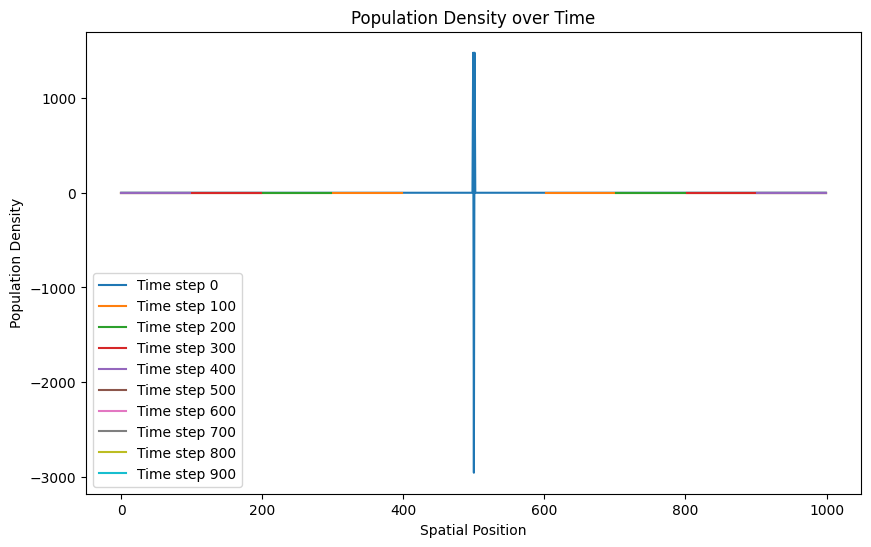

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('population_data.csv', header=None)

# Transpose the data so each column represents a time step
data = data.T

# Plotting
plt.figure(figsize=(10, 6))
for i in range(0, len(data.columns), 100):  # Plot every 100th time step as an example
    plt.plot(data.index, data[i], label=f'Time step {i}')

plt.title('Population Density over Time')
plt.xlabel('Spatial Position')
plt.ylabel('Population Density')
plt.legend()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Read the CSV file generated by C++ code
df = pd.read_csv('result.csv', header=None)

# Extract time steps and population data
times = df.columns.values
populations = df.values.T

# Create a colormap with a gradient of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(times)))
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Plot the population at each time step
for i, (time, population) in enumerate(zip(times, populations)):
    plt.plot(population, color=colors[i], label=f'Time {time:.2f}')

# Add labels and legend
plt.xlabel('Spatial Index')
plt.ylabel('Population')
plt.title('Population at Each Time Step')
plt.legend()
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Time')

# Show plot
plt.show()


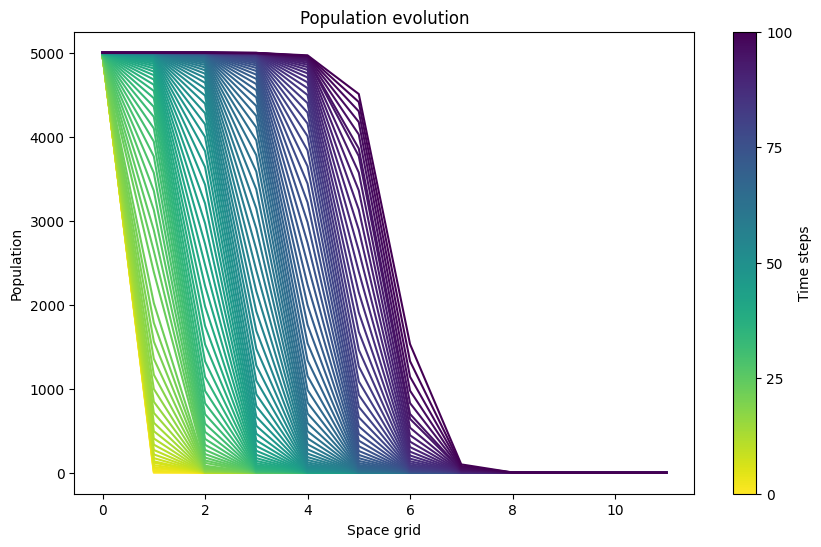

In [5]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Ruta de la carpeta que contiene los archivos de texto
carpeta = "OutputValuesPopulationa"

# Obtener la lista de archivos ordenados
archivos = sorted([archivo for archivo in os.listdir(carpeta) if archivo.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))
fig, ax = plt.subplots(figsize=(10, 6))
# Configurar la gráfica
#plt.figure(figsize=(10, 6))
plt.xlabel('Space grid')
plt.ylabel('Population')
plt.title('Population evolution')

# Preparamos la barra de colores para la leyenda usando la paleta 'plasma', pero invertimos los colores
# Ahora invertimos la asignación de colores directamente en la creación de colores_leyenda
colores_leyenda = plt.cm.viridis(np.linspace(1, 0, len(archivos)))

# Leer y plotear los datos de cada archivo de texto
for i, archivo in enumerate(archivos):
    with open(os.path.join(carpeta, archivo), 'r') as file:
        datos = file.readlines()
        # Extraemos los datos y los convertimos a números
        y = [float(linea.strip()) for linea in datos]
        # Plotear los datos con el color correspondiente
        plt.plot(y, label=f'{archivo}', color=colores_leyenda[i])

# Añadir la leyenda de tiempo como una barra de color invertida
norm = plt.Normalize(0, len(archivos))
sm = ScalarMappable(norm, plt.cm.viridis.reversed()) # Invertimos el colormap aquí
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', label='Time steps')
#cbar = plt.colorbar(sm, label='Time steps')
cbar.set_ticks(np.linspace(0, len(archivos), num=5)) # Ajustar a la cantidad de ticks que se prefiera
cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)]) # Etiquetas de 0 a 100

# Mostrar la gráfica
plt.show()


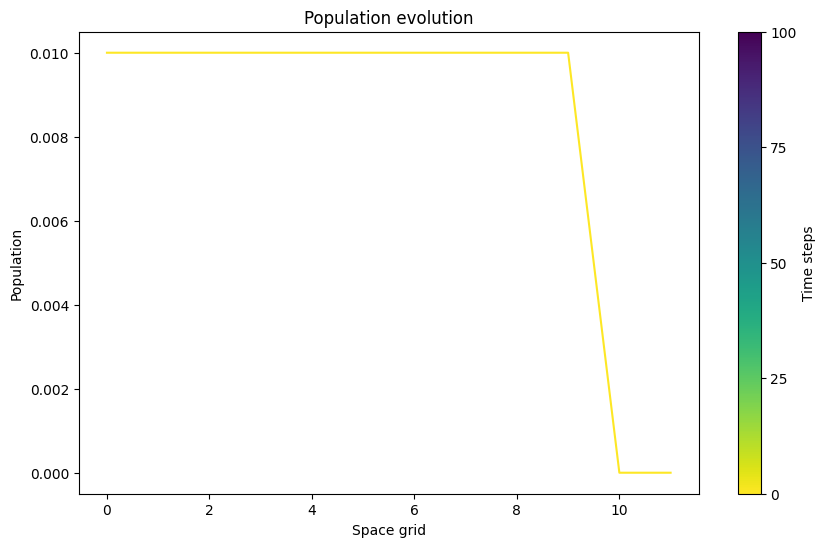

In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Ruta de la carpeta que contiene los archivos de texto
carpeta = "OutputValuesOxygena"

# Obtener la lista de archivos ordenados
archivos = sorted([archivo for archivo in os.listdir(carpeta) if archivo.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Configurar la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Space grid')
plt.ylabel('Population')
plt.title('Population evolution')

# Preparamos la barra de colores para la leyenda usando la paleta 'plasma', pero invertimos los colores
# Ahora invertimos la asignación de colores directamente en la creación de colores_leyenda
colores_leyenda = plt.cm.viridis(np.linspace(1, 0, len(archivos)))

# Leer y plotear los datos de cada archivo de texto
for i, archivo in enumerate(archivos):
    with open(os.path.join(carpeta, archivo), 'r') as file:
        datos = file.readlines()
        # Extraemos los datos y los convertimos a números
        y = [float(linea.strip()) for linea in datos]
        # Plotear los datos con el color correspondiente
        plt.plot(y, label=f'{archivo}', color=colores_leyenda[i])

# Añadir la leyenda de tiempo como una barra de color invertida
norm = plt.Normalize(0, len(archivos))
sm = ScalarMappable(norm, plt.cm.viridis.reversed()) # Invertimos el colormap aquí
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,orientation='vertical', label='Time steps')
cbar.set_ticks(np.linspace(0, len(archivos), num=5)) # Ajustar a la cantidad de ticks que se prefiera
cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)]) # Etiquetas de 0 a 100

# Mostrar la gráfica
plt.show()


import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
import imageio
from IPython.display import Video

# Folder that contains text files
folder = "OutputValuesPopulationa"

# Get the sorted list of files
files = sorted([file for file in os.listdir(folder) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Create a directory for the frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Loop to generate a frame for each time step
for i, file in enumerate(files):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Space grid')
    plt.ylabel('Population')
    plt.title('Population evolution')

    # Legend color bar configuration
    color_legend = plt.cm.viridis(np.linspace(1, 0, len(files)))
    norm = plt.Normalize(0, len(files))
    sm = ScalarMappable(norm, plt.cm.viridis.reversed())
    sm.set_array([])
    cbar = plt.colorbar(sm,ax=ax, label='Time steps')
    cbar.set_ticks(np.linspace(0, len(files), num=5))
    cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)])

    # Read and plot data for the current time step
    with open(os.path.join(folder, file), 'r') as f:
        data = f.readlines()
        y = [float(line.strip()) for line in data]
        plt.plot(y, color=color_legend[i])

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()

# Create video from frames
with imageio.get_writer('population_evolution.mp4', fps=5) as video:
    for i in range(len(files)):
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        video.append_data(imageio.imread(frame_path))

# Cleanup frames directory if desired
# import shutil
# shutil.rmtree(frames_dir)

print("Video created: population_evolution.mp4")
video_path = "population_evolution.mp4"  # Replace with your video file path
video = Video(video_path, embed=True, width=720, height=480)
display(video)

In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
import imageio
from IPython.display import Video

# Folder that contains text files
folder = "OutputValuesPopulationa"

# Get the sorted list of files
files = sorted([file for file in os.listdir(folder) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Determine the global min and max y-values to keep y-axis fixed
min_y, max_y = float('0'), -float('10000')
for file in files:
    with open(os.path.join(folder, file), 'r') as f:
        data = f.readlines()
        y = [float(line.strip()) for line in data]
        min_y = min(min_y, min(y))
        max_y = max(max_y, max(y))

# Adjust the range slightly to avoid clipping the highest and lowest points
y_range = (min_y - (max_y - min_y) * 0.05, max_y + (max_y - min_y) * 0.05)

# Create a directory for the frames
frames_dir = "frames_more_r"
os.makedirs(frames_dir, exist_ok=True)

# Generate a frame for each time step with fixed y-axis
for i, file in enumerate(files):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Space grid')
    plt.ylabel('Population')
    plt.title('Fisher Kolmogorov population evolution')
    plt.ylim(y_range)  # Set the y-axis to the fixed range

    color_legend = plt.cm.viridis(np.linspace(1, 0, len(files)))
    norm = plt.Normalize(0, len(files))
    sm = ScalarMappable(norm, plt.cm.viridis.reversed())
    sm.set_array([])
    cbar = plt.colorbar(sm,ax=ax, label='Time steps')
    cbar.set_ticks(np.linspace(0, len(files), num=5))
    cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)])

    with open(os.path.join(folder, file), 'r') as f:
        data = f.readlines()
        y = [float(line.strip()) for line in data]
        plt.plot(y, color=color_legend[i])

    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()

# Create video from frames
with imageio.get_writer('population_evolution_good.mp4', fps=5) as video:
    for i in range(len(files)):
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        video.append_data(imageio.imread(frame_path))

# Optional: Cleanup frames directory
# import shutil
# shutil.rmtree(frames_dir)

print("Video created: population_evolution_good.mp4")

video_path = "population_evolution_good.mp4"  # Replace with your video file path
video = Video(video_path, embed=True, width=720, height=480)
display(video)


C:\Users\guill\AppData\Local\Temp\ipykernel_16852\3766976635.py:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  video.append_data(imageio.imread(frame_path))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 600) to (1008, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video created: population_evolution_good.mp4
